In [150]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [151]:
def set_seed(seed=2):
    np.random.seed(seed)
    random.seed(seed)

In [152]:
def get_data(N, D):

    set_seed()

    X = np.random.uniform(-1, 1, size=(N, D))
    w = np.random.uniform(-1, 1, size=D)
    y = np.matmul(X, w) + np.random.normal(size=N)
    return w, X, y

In [153]:
def gradient(w, x_i, y_i):
    return 2*(np.dot(w, x_i) - y_i)*x_i

def get_loss(w, X, y):
    return np.sum((np.matmul(X, w) - y)**2)

In [154]:
def sgd(w_0, X, y, lr, nr_epochs, decreasing_lr = True):

    set_seed()

    w = w_0
    losses = [get_loss(w, X, y)]
    k = 0

    for s in range(nr_epochs):
        for i in range(300):
            if decreasing_lr:
              w = w - lr/np.sqrt(k + 1)*gradient(w, X[i], y[i])
            else:
              w = w - lr*gradient(w, X[i], y[i])
            losses.append(get_loss(w, X, y))
            k += 1
    return losses, w

In [155]:
def sgd_shuffle(w_0, X, y, lr, nr_epochs, decreasing_lr = True):

    set_seed()

    w = w_0
    losses = [get_loss(w, X, y)]
    k = 0

    for s in range(nr_epochs):
        ndx = list(range(300))
        random.shuffle(ndx)

        for i in ndx:
            if decreasing_lr:
              w = w - lr/np.sqrt(k + 1) * gradient(w, X[i], y[i])
            else:
              w = w - lr*gradient(w, X[i], y[i])
            losses.append(get_loss(w, X, y))
            k += 1
    return losses, w

In [156]:
def sgd_momentum(w_0, X, y, lr, nr_epochs, beta=0.5, decreasing_lr = True):

    set_seed()

    w = w_0
    delta_w = np.zeros_like(w)  # Initialize delta_w to zero
    k = 0
    v = 0
    losses = [get_loss(w, X, y)]

    for s in range(nr_epochs):
        ndx = list(range(300))
        random.shuffle(ndx)

        for i in ndx:
            if decreasing_lr:
              v = beta * v - lr/np.sqrt(k + 1) * gradient(w, X[i], y[i])  # Update the velocity with momentum
            else:
              v = beta * v - lr*gradient(w, X[i], y[i])
            w = w + v  # Update weights using velocity
            losses.append(get_loss(w, X, y))
            k += 1
    return losses, w

In [157]:
def plot(loss):
    for name, loss_val in loss.items():
        plt.plot(np.arange(len(loss_val)), loss_val, label=name)
    plt.legend()
    plt.savefig('loss.png')

def test_case(lr, nr_epochs, decreasing_lr = True):
    w_0, X, y = get_data(300, 10)
    loss = {}
    loss['SGD'], w_sgd = sgd(w_0, X, y, lr, nr_epochs, decreasing_lr = decreasing_lr)
    loss['SGD-shuffle'], w_sgd_shuffle = sgd_shuffle(w_0, X, y, lr, nr_epochs, decreasing_lr = decreasing_lr)
    loss['SGD-momentum'], w_sgd_momentum = sgd_momentum(w_0, X, y, lr, nr_epochs, decreasing_lr = decreasing_lr)
    plot(loss)
    plt.show()

Decreasing learning rate and 5 epochs

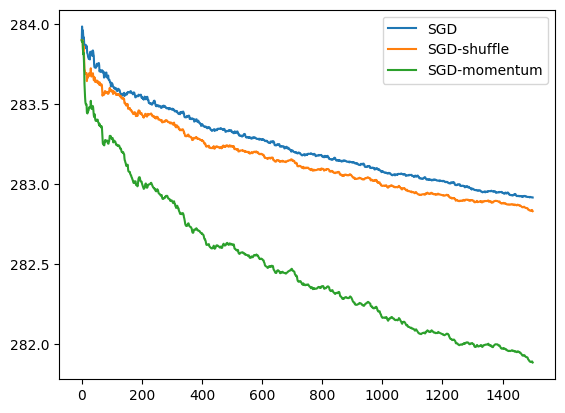

In [158]:
test_case(0.001, 5, decreasing_lr=True)

Constant learning rate 0.0001

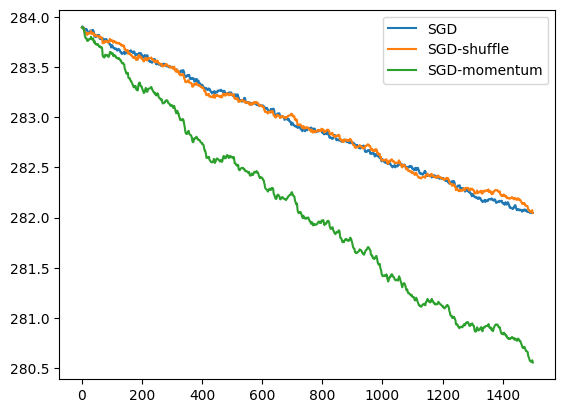

In [159]:
test_case(0.0001, 5, decreasing_lr=False)

Constant learning rate 0.1

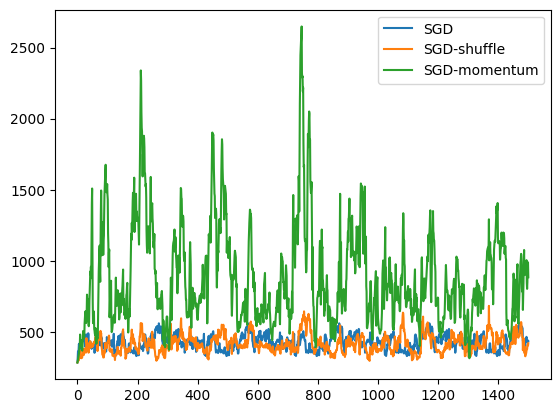

In [160]:
test_case(0.1, 5, decreasing_lr=False)